# Linear Regression Project

## NASA Airfoil Pressure Level

Author: Piotr Druzdzel <br>
E-mail: piotr.druzdzel@gmail.com <br>

Data source: UCI Machine Learning Repository <br>
https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise

Data Set Information: <br>
The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. <br>
The span of the airfoil and the observer position were the same in all of the experiments.

Independent variables: <br>
1. Frequency, in Hertzs. <br>
2. Angle of attack, in degrees. <br>
3. Chord length, in meters. <br>
4. Free-stream velocity, in meters per second. <br>
5. Suction side displacement thickness, in meters. <br>

Dependent variable: <br>
6. Scaled sound pressure level, in decibels.

In [53]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as sk

Quick fix for the dark theme plotting:

In [49]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

Importing dataset:

In [22]:
df_original = pd.read_csv("airfoil_self_noise.dat", 
                          sep='\t', 
                          names=["Frequency", "AoA", "Chord", "V_inf", "displacement_t", "SPL"], 
                          engine='python')

Making a copy:

In [28]:
df = df_original.copy()

### Data exploration:

Checking the structure:

In [29]:
df

,Frequency,AoA,Chord,V_inf,displacement_t,SPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


Basic check for the type of data:

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Frequency       1503 non-null   int64  
 1   AoA             1503 non-null   float64
 2   Chord           1503 non-null   float64
 3   V_inf           1503 non-null   float64
 4   displacement_t  1503 non-null   float64
 5   SPL             1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


Routine check for missing values:

In [27]:
df.isnull().sum()

Frequency         0
AoA               0
Chord             0
V_inf             0
displacement_t    0
SPL               0
dtype: int64

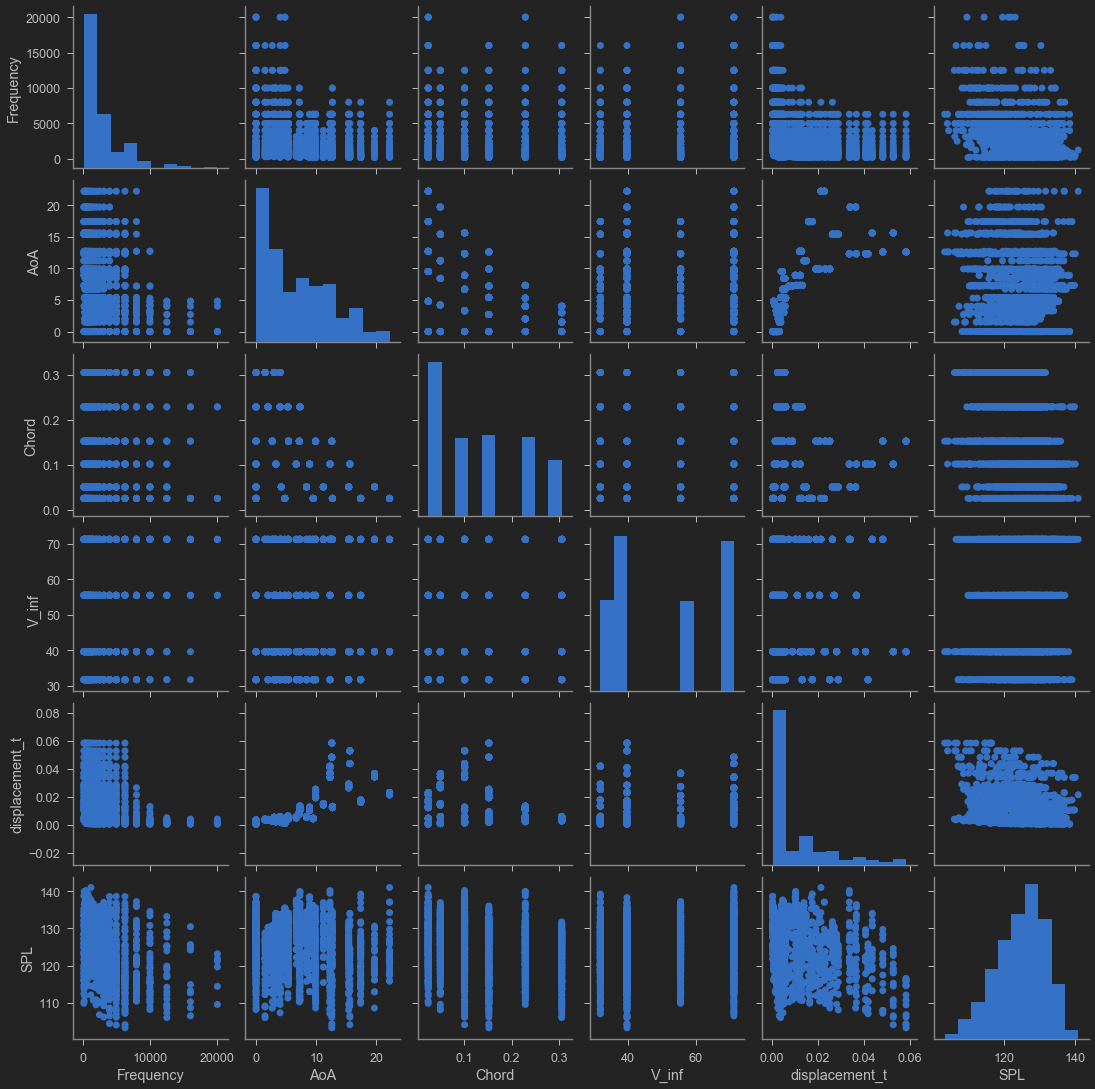

In [54]:
sns.pairplot(df, plot_kws=dict(edgecolor="none"))

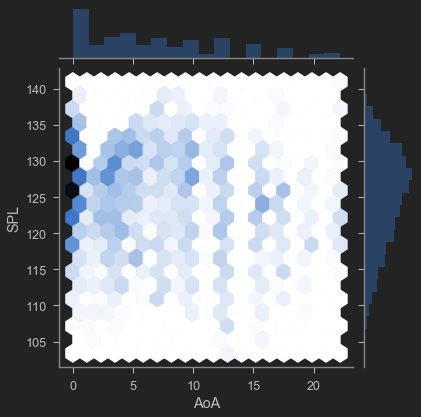

In [119]:
sns.jointplot(x='AoA',y='SPL',data=df, kind='hex');

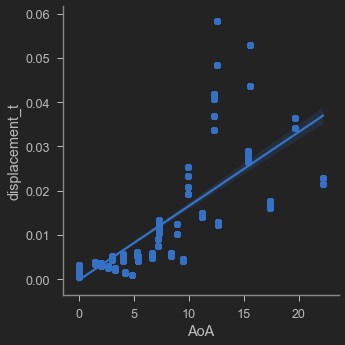

In [114]:
sns.lmplot(x='AoA', y='displacement_t', data=df)

### Train-Test set split

In [66]:
from sklearn.model_selection import train_test_split

In [59]:
y = df['SPL']
X = df.drop(['SPL'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\PDL3\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### Scaling the data
Not a must in regression due to coefficients accounting for scale of numbers but helps in interpretation.

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training the model

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
linear_model = LinearRegression()

In [123]:
linear_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predictions:

In [125]:
for coefficient in linear_model.coef_:
    print(coefficient)

-4.059447042606654
-2.3667367900365717
-3.2199521491835017
1.5269010028407006
-1.8155901496175622


Predicted Sound Pressure Levels (SPL):

In [126]:
predictions = linear_model.predict(X_test)

Checking how did simple linear model perform (actually, not too good):

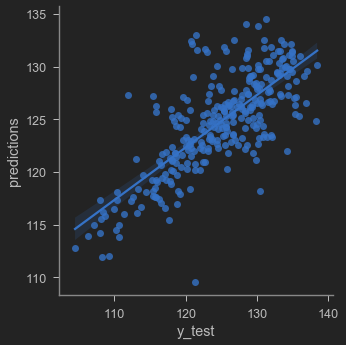

In [127]:
pred_df = pd.DataFrame({'y_test':y_test, 'predictions':predictions})
sns.lmplot(x='y_test', y='predictions', data=pred_df)

### Residuals (y_test - y_pred):

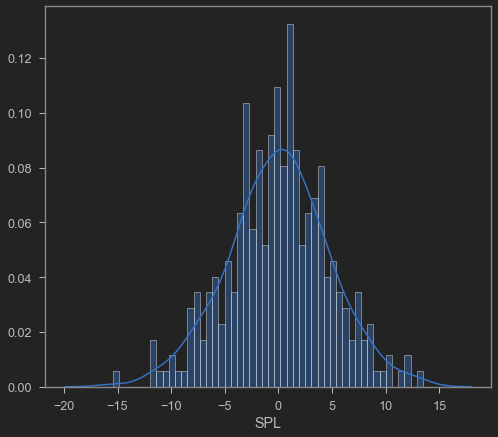

In [128]:
sns.distplot((y_test-predictions),
             bins=50,
             hist_kws=dict(edgecolor="w", linewidth=1));

### Coefficients table:

In [129]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Frequency,-4.059447
AoA,-2.366737
Chord,-3.219952
V_inf,1.526901
displacement_t,-1.815590


Frequency, Angle of attack and Chord length have the biggest impact on self-induced noise of NACA 0012 airfoil.

### R2 score:

In [105]:
from sklearn.metrics import r2_score

In [130]:
r2_score(y_test, predictions)

0.5582979754897284

In [72]:
#polynomial_features= PolynomialFeatures(degree=4)
#X_train_p = polynomial_features.fit_transform(X_train)
#X_test_p = polynomial_features.fit_transform(X_test)
#model = LinearRegression().fit(X_train_p, y_train)
#y_pred = model.predict(X_test_p)
#print('r2 score:',r2_score(y_test ,y_pred))

### Polynomial Linear Regression:

In [131]:
from sklearn.preprocessing import PolynomialFeatures

In [132]:
poly_reg = PolynomialFeatures(degree=5)

X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test  = poly_reg.fit_transform(X_test)

In [147]:
X_train.shape

(1202, 5)

In [145]:
X_poly_train.shape

(1202, 252)

In [133]:
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [136]:
predictions_poly = poly_model.predict(X_poly_test)

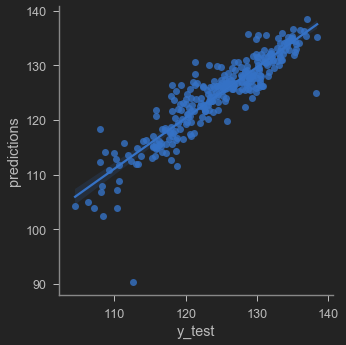

In [138]:
pred_poly_df = pd.DataFrame({'y_test':y_test, 'predictions':predictions_poly})
sns.lmplot(x='y_test', y='predictions', data=pred_poly_df)

### R2 score:

In [139]:
r2_score(y_test, predictions_poly)

0.8127372740590301